In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data= pd.read_csv(r'C:\Users\Arvind Vasa\Downloads\archive (1)\data.csv')
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,USA
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,USA
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,USA


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  country        4600 non-null   object 
dtypes: float64(3), int64(10), object(2)
memory usage: 539.2+ KB


In [14]:
data.shape

(4600, 15)

In [21]:
data['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [22]:
data['country'].unique()

array(['USA'], dtype=object)

In [24]:
data.drop('country', axis=1, inplace= True)

In [15]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
country          0
dtype: int64

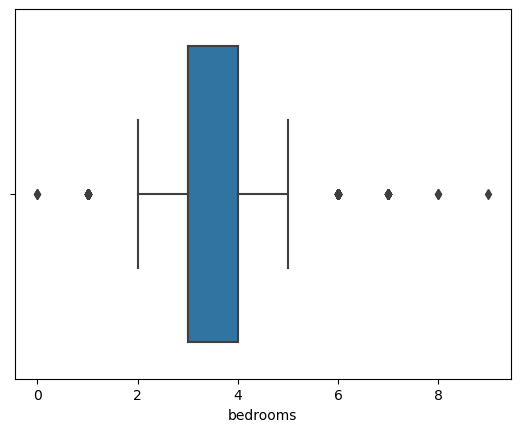

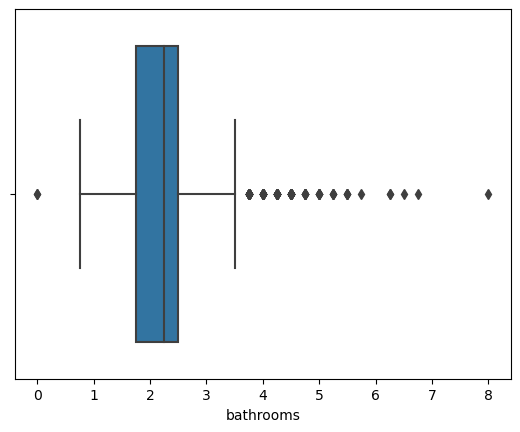

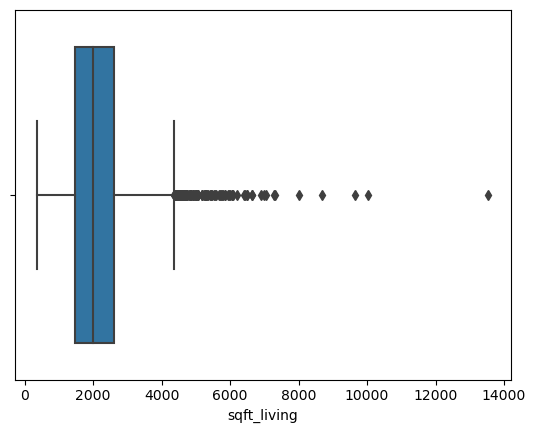

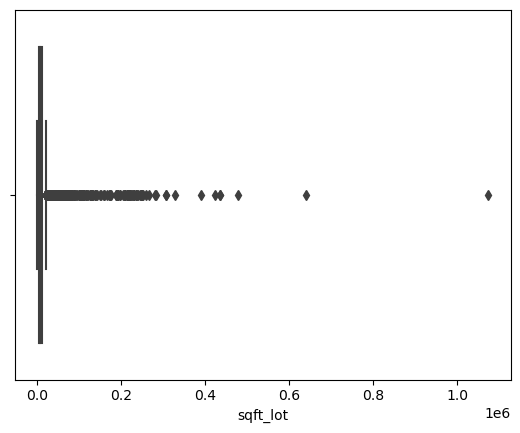

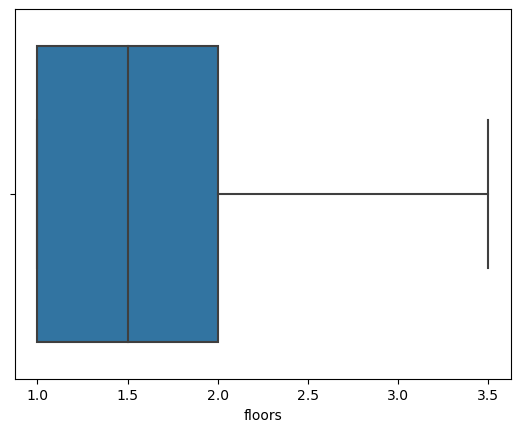

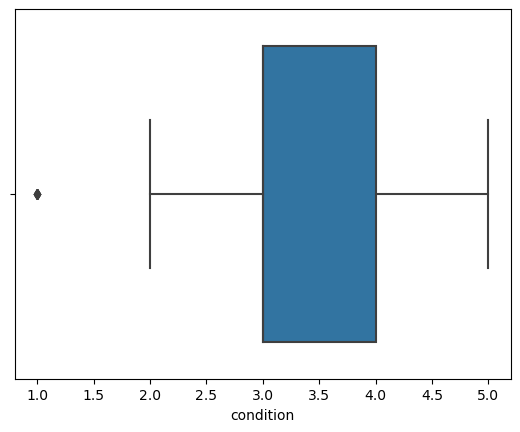

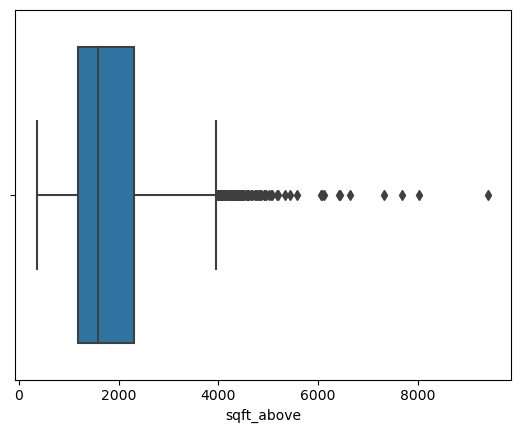

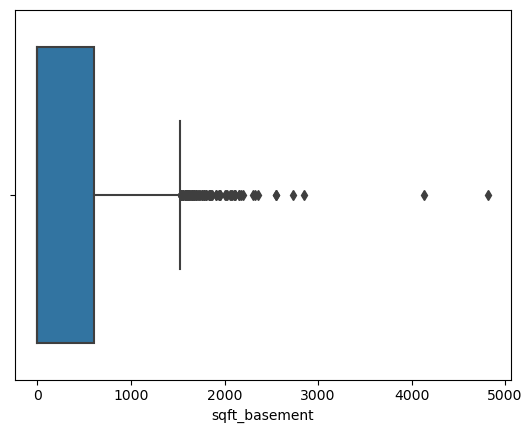

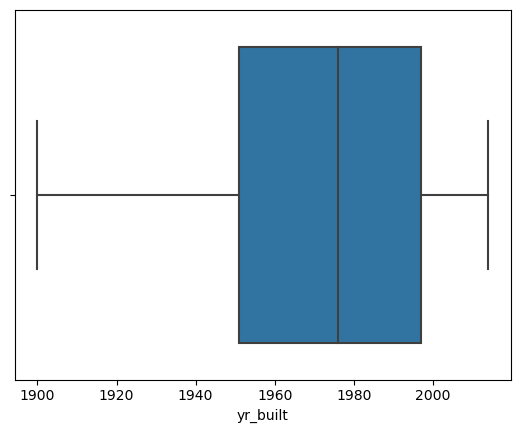

In [18]:
for feature in data.select_dtypes([int, float]).drop(['price','waterfront','view','yr_renovated'], axis=1):
    sns.boxplot(x= data[feature])
    plt.show()

In [19]:
for feature in data.select_dtypes([int, float]).drop(['price','waterfront','view','yr_renovated'], axis=1):
    Q1= data[feature].quantile(0.25)
    Q3= data[feature].quantile(0.75)
    IQR= Q3 - Q1
    lower_limit= Q1-1.5*IQR
    upper_limit= Q3+1.5*IQR
    
    data.loc[data[feature]< lower_limit, feature]= lower_limit
    data.loc[data[feature]>upper_limit, feature]= upper_limit

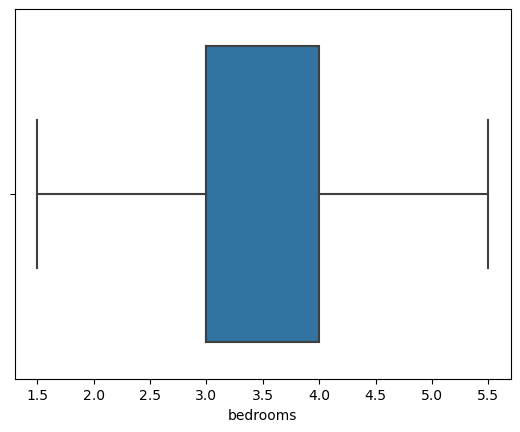

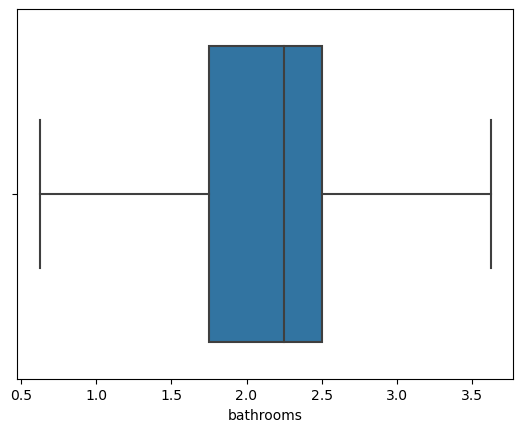

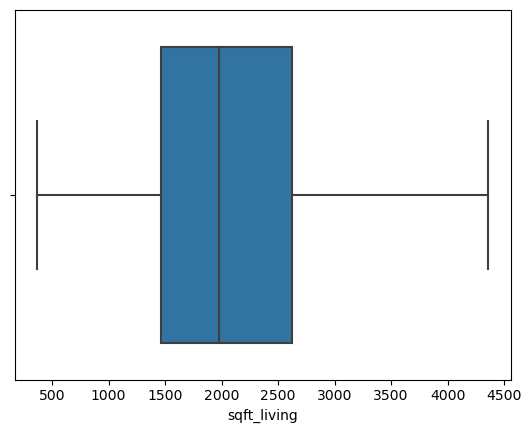

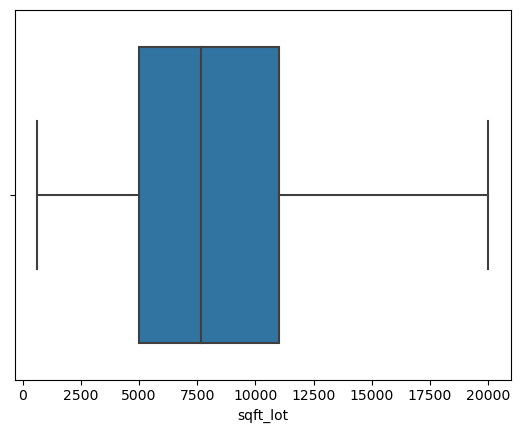

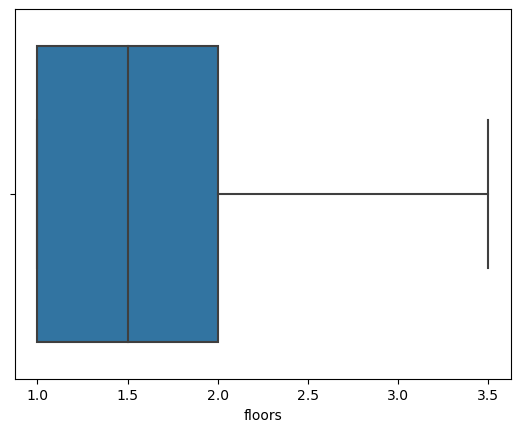

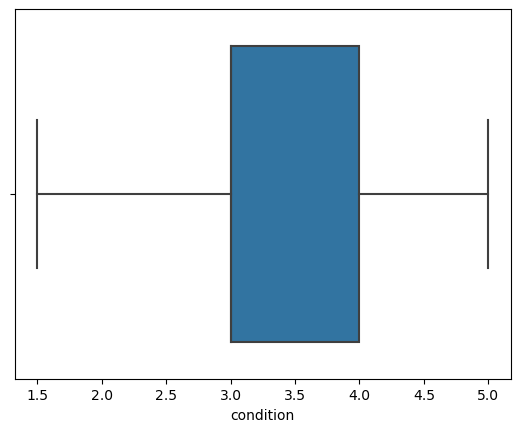

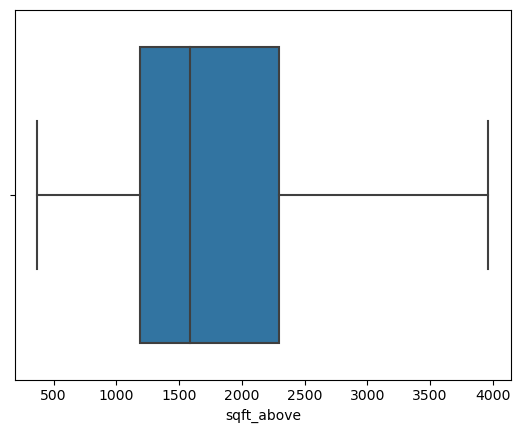

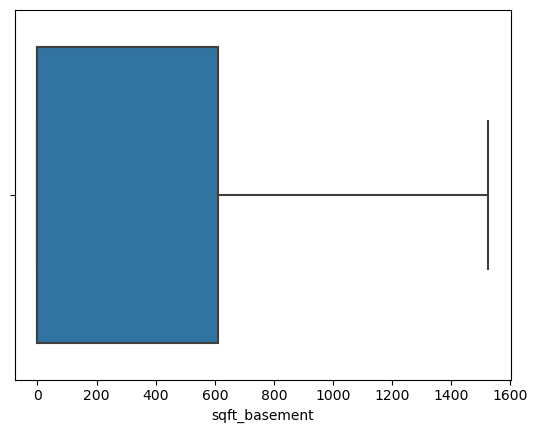

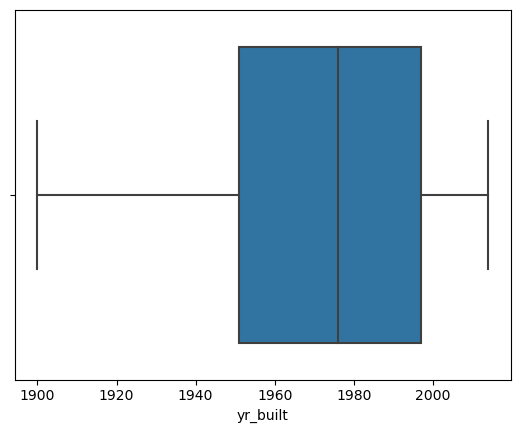

In [20]:
for feature in data.select_dtypes([int, float]).drop(['price','waterfront','view','yr_renovated'], axis=1):
    sns.boxplot(x= data[feature])
    plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

### Label Encoding

In [26]:
Le= LabelEncoder()
data['city']= Le.fit_transform(data['city'])

In [27]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3.0,1340,0,1955,2005,36
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5.0,3370,280,1921,0,35
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4.0,1930,0,1966,0,18
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4.0,1000,1000,1963,0,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4.0,1140,800,1976,1992,31


### Data Splitting

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X= data.drop('price', axis=1)
y= data['price']

### Scaling data

In [37]:
scaler= StandardScaler()
x_scaled= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [38]:
x_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,-0.458189,-0.887141,-0.893443,-0.189845,-0.022416,-0.085004,-0.309194,-0.670178,-0.587610,-0.696559,-0.531014,1.221670,0.861805
1,1.875885,0.500844,1.770878,0.021384,0.906555,-0.085004,4.830079,2.292645,1.948111,-0.057998,-1.674693,-0.825693,0.778343
2,-0.458189,-0.193149,-0.212946,0.559109,-0.951388,-0.085004,-0.309194,0.811234,0.149373,-0.696559,-0.161000,-0.825693,-0.640521
3,-0.458189,0.153847,-0.132209,-0.167943,-0.951388,-0.085004,-0.309194,0.811234,-1.012312,1.584014,-0.261913,-0.825693,-1.892459
4,0.708848,0.500844,-0.201412,0.290525,-0.951388,-0.085004,-0.309194,0.811234,-0.837435,1.127899,0.175376,1.208396,0.444493


### Model building

In [39]:
from sklearn.linear_model import LinearRegression

In [41]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size=0.2, random_state=1)

In [42]:
LR= LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [45]:
y_test_pred= LR.predict(x_test)

In [47]:
from sklearn.metrics import  r2_score

In [46]:
y_test_pred

array([ 469209.57788527,  695878.9817423 ,  268843.9011518 ,
        704743.07954468,  805089.43027947,  620770.3817668 ,
        267818.82371755,  303170.72563063,  437499.84565244,
        498331.64431031,  421049.10785024,  304059.83229539,
        323034.7678562 ,  754072.02907162,  280174.78955216,
        564572.50511885,  605554.36155215,  473746.69278821,
        469511.52471459,  546679.21204116,  408202.62738224,
        588312.41828883,  643830.24993637,  242357.42413836,
        567228.36743728,  602365.4904219 ,  271654.96544457,
        294799.68580817,  646572.14452253,  423091.94164123,
        484810.5051322 ,  948033.3906532 ,  284397.19534362,
        393945.93911724,  548808.79962723,  481649.43468089,
        234171.18885582,  496023.19686596,  723643.64023565,
        172681.27739601,  856366.77935257,  439659.5917841 ,
        756628.66427756,  528155.76226047,  469825.98876262,
        595672.78049714,  552763.88946332,  726033.64988848,
        408194.76374758,

In [49]:
 r2_score(y_test, y_test_pred)

0.4398261734527432

In [43]:
LR.score(x_test, y_test)

0.4398261734527432